# XOR-XNOR Computation using ANN

In [45]:
#import necessary libraries and modules
from numpy import*
import matplotlib.pyplot as plt

In [152]:
#activation functions and their derivatives

def tanh(x):
    return(1.0-exp(-2*x))/(1.0+exp(-2*x))

def sigmoid(x):
    return(1/(1+exp(-x)))


def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

def tanh_der(x):
    return (1+x)*(1-x)

Training data:

X (input)is the possible set of booleans True or False in terms of integers 1 and 0.

1st column of input here is the input bias term ie 1.

last column indicates the type of gate XOR is 1 and XNOR is 0.

Y(expected_output) is the result of logical operation XOR or XNOR on each of these set.



In [189]:

x=array([[1,1,1,0],[1,1,0,0],[1,0,1,0],[1,0,0,0],[1,1,1,1],[1,1,0,1],[1,0,1,1],[1,0,0,1]])
y=array([[1],[0],[0],[1],[0],[1],[1],[0]])


Initialisation of network parameters:

Initialise weights with number generated randomly from Gaussian Distribution with mean =0 and std=1.

Bias initialisation is done in input and in forward propagation with the value 1.

In [206]:

w1=random.normal(0,1,(4,8))
w2=random.normal(0,1,(9,1))


Hyper-paramter initialisation

In [198]:
lr=0.09  # learning rate 
epochs=20000  # total no of iterations
l=len(x)  # length of input data , this value is used in finding gradient.

In [205]:
cost=[]  # an array for storing the losses

Forward Propagation:

This ANN involves only 1 hidden layer.

Forward propagation involves mulitplication of weights with inputs and addition of bias and passing through activation function in each layer.




In [200]:
#Forward propagation

def forwardprop(x,w1,w2,predict=False):
    a1=matmul(x,w1)     #matrix multipliation
    z1=sigmoid(a1)       #passing through activation function
    # create and add bias
    bias = ones((len(z1),1))  # bias for hidden layer
    z1=concatenate((bias,z1),axis=1)   # bias added 
    a2=matmul(z1,w2)
    z2=sigmoid(a2)   # final layer output
    if predict:               # while training predict is made false while testing predict is made true
        return z2
    else:
        return a1,z1,a2,z2



Backward Propagation:

Differentiating the cost function with respect to weights and moving in the direction of negative gradient  to minimize the cost function 

In [169]:
#Backward propagation

def backprop(a2,z0,z1,z2,y):
    delta2=z2-y        #loss or the difference between actual and predicted output
    Delta2=matmul(z1.T,delta2)   # change in outer layer weights
    delta1=(delta2.dot(w2[1:,:].T))*sigmoid_der(a1)  
    #print(a1)
    Delta1=matmul(z0.T,delta1) #change in hidden layer weights
    
    return delta2,Delta1,Delta2

Training Algorithm:

In [207]:
print("Training starts ....")
for i in range(epochs):
    a1,z1,a2,z2=forwardprop(x,w1,w2) #forward propagation
    #print(a1)
    
    delta2,Delta1,Delta2=backprop(a2,x,z1,z2,y)   # backward propagation
    
    #weight updation
    
    w1-=lr*(1/m)*Delta1   
    w2-=lr*(1/m)*Delta2
   # print(delta2)
   # print()
    c=mean(abs(delta2))                       #error
    #print(c)
    cost.append(c)
    
    if i%1000==0:
        print(f"Iteration: {i}. Error:{c}")

print("Training Complete.....")

print()

z3=forwardprop(x,w1,w2,True)                      #output prediction 
print("Output probability :")
print(z3)
print()
print("Predictions :")
print(around(z3))

Training starts ....
Iteration: 0. Error:0.49830719103175347
Iteration: 1000. Error:0.4826147470946012
Iteration: 2000. Error:0.39381327123586984
Iteration: 3000. Error:0.1838368517255431
Iteration: 4000. Error:0.08058967697467688
Iteration: 5000. Error:0.04478953578003293
Iteration: 6000. Error:0.02926128303307307
Iteration: 7000. Error:0.021127239125879067
Iteration: 8000. Error:0.016282726649630656
Iteration: 9000. Error:0.013125697103536123
Iteration: 10000. Error:0.010929293242032664
Iteration: 11000. Error:0.009324340740315618
Iteration: 12000. Error:0.008106258033417357
Iteration: 13000. Error:0.007153606567020868
Iteration: 14000. Error:0.0063902097428974024
Iteration: 15000. Error:0.005766079534727417
Iteration: 16000. Error:0.005247163324488481
Iteration: 17000. Error:0.00480952267916606
Iteration: 18000. Error:0.004435872311694403
Iteration: 19000. Error:0.004113439636096828
Training Complete.....

Output probability :
[[0.99506843]
 [0.0053868 ]
 [0.00351539]
 [0.99622029]


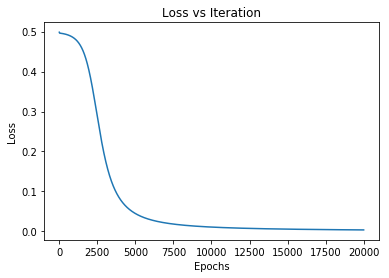

In [209]:
#plotting of relationship between cost function and iteration 
plt.plot(cost)
plt.title('Loss vs Iteration')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()
#the cost function is found to be decreasing at start and finally saturates after 10000 iterations.